In [1]:
import sys, os, pickle
import torch
sys.path.append('/home/om2382/mft-theory/')
from cluster import *
from core import *
from empirics import *
from functions import *
from LDR_dim import *
from ode_methods import *
from plotting import *
from theory import *
from utils import *
from functools import partial
import matplotlib.pyplot as plt

In [19]:
### --- SET UP ALL CONFIGS --- ###
from itertools import product
n_seeds = 20
macro_configs = config_generator(N=[2000, 4000])

micro_configs = tuple(product(macro_configs, list(range(n_seeds))))
prototype = False

### --- SELECT PARTICULAR CONFIG --- ###
try:
    i_job = int(os.environ['SLURM_ARRAY_TASK_ID']) - 1
except KeyError:
    i_job = 0
    prototype = True
params, i_seed = micro_configs[i_job]
i_config = i_job//n_seeds

new_random_seed_per_condition = True
if new_random_seed_per_condition:
    np.random.seed(i_job)
else: #Match random seeds across conditions
    np.random.seed(i_seed)

In [ ]:
if False:
    ### --- M = 2 network --- ###

    N = 2000
    M = 2
    phi_torch = lambda x: torch.erf((np.sqrt(np.pi)/2)*x)
    phi_prime_torch = lambda x: torch.exp(-(np.pi/4)*x**2)
    R = 2
    N_tasks = M
    D1 = 2
    D = D1*np.ones(N_tasks)
    D[0] = 2

    sym = 0
    sigma_mn_all = np.zeros((R, R, N_tasks))
    total_attempts = 0
    C_sigma = 0.5
    for i_task in range(N_tasks):
        sigma_mn_all[:,:,i_task], n_attempts = generate_positive_definite_covariance(R=R, sigma_on=C_sigma,
                                                                                     sigma_off=C_sigma,
                                                                                     symmetry_factor=sym,
                                                                                     traceless=False, report_attempts=True)
        total_attempts += n_attempts
    print(total_attempts)
    sigma_mn_all[:,:,0] = np.array([[0.8, 0.4],[-0.4, 0.8]])
    if M >= 2:
        sigma_mn_all[:,:,1] = np.array([[0.5, 0.3],[0.3, 0.5]])
        #sigma_mn_all[:,:,1] = np.array([[0.45, 0.3],[0.3, 0.45]])

    W_, all_loadings = sample_W_optimized(sigma_mn_all, D, N)
    T_sim = 100
    dt = 0.05
    N_runs = 180
    Zs = []
    for i_run in range(N_runs):
        if i_run > 120:
            ic_std = 50
        elif i_run > 60:
            ic_std = 10
        else:
            ic_std = 2
        x0_1 = torch.tensor(all_loadings[0,:,2:4].dot(np.random.normal(0, ic_std, 2))).to(torch.float).to(0)[None,:]
        x0_2 = torch.tensor(all_loadings[1,:,2:4].dot(np.random.normal(0, ic_std, 2))).to(torch.float).to(0)[None,:]
        x0 = 0*x0_1 + x0_2
        x, r = sample_activity(T_sim=T_sim, dt_save=dt, dt=dt, W=W_, phi_torch=phi_torch, x0=x0,
                               runga_kutta=False, T_save_delay=0, noise_series=None)
        Z_ = np.einsum('air, ti -> atr', all_loadings[:, :, 2:4], r) * D[:,None,None]
        Zs.append(Z_)
    #single long run for plotting line attractor
    Zs = np.array(Zs)
    x, r = sample_activity(T_sim=120, dt_save=dt, dt=dt, W=W_, phi_torch=phi_torch, x0=None,
                           runga_kutta=False, T_save_delay=100, noise_series=None)
    Z_long = np.einsum('air, ti -> atr', all_loadings[:, :, 2:4], r) * D[:,None,None]
    x, r = sample_activity(T_sim=500, dt_save=dt, dt=dt, W=W_, phi_torch=phi_torch, x0=None, N_batch=10,
                           runga_kutta=False, T_save_delay=0, noise_series=None)
    Z_long2 = np.einsum('air, tbi -> batr', all_loadings[:, :, 2:4], r) * D[None,:,None,None]

    ### --- M = 2 network --- ###

    N = 2000
    M = 2
    phi_torch = lambda x: torch.erf((np.sqrt(np.pi)/2)*x)
    phi_prime_torch = lambda x: torch.exp(-(np.pi/4)*x**2)
    R = 2
    N_tasks = M
    D1 = 2
    D = D1*np.ones(N_tasks)
    D[0] = 2.35

    sym = 0
    sigma_mn_all = np.zeros((R, R, N_tasks))
    total_attempts = 0
    C_sigma = 0.5
    for i_task in range(N_tasks):
        sigma_mn_all[:,:,i_task], n_attempts = generate_positive_definite_covariance(R=R, sigma_on=C_sigma,
                                                                                     sigma_off=C_sigma,
                                                                                     symmetry_factor=sym,
                                                                                     traceless=False, report_attempts=True)
        total_attempts += n_attempts
    print(total_attempts)
    sigma_mn_all[:,:,0] = np.array([[0.6, 0.4],[-0.4, 0.3]])
    if M >= 2:
        #sigma_mn_all[:,:,1] = np.array([[0.5, 0.3],[0.3, 0.5]])
        sigma_mn_all[:,:,1] = np.array([[0.4, 0.3],[-0.3, 0.7]])
        #sigma_mn_all[:,:,1] = np.array([[0.45, 0.3],[0.3, 0.45]])

    W_, all_loadings = sample_W_optimized(sigma_mn_all, D, N)
    T_sim = 100
    dt = 0.05
    N_runs = 180
    Zs = []
    for i_run in range(N_runs):
        if i_run > 120:
            ic_std = 50
        elif i_run > 60:
            ic_std = 10
        else:
            ic_std = 2
        x0_1 = torch.tensor(all_loadings[0,:,2:4].dot(np.random.normal(0, ic_std, 2))).to(torch.float).to(0)[None,:]
        x0_2 = torch.tensor(all_loadings[1,:,2:4].dot(np.random.normal(0, ic_std, 2))).to(torch.float).to(0)[None,:]
        x0 = 0*x0_1 + x0_2
        x, r = sample_activity(T_sim=T_sim, dt_save=dt, dt=dt, W=W_, phi_torch=phi_torch, x0=x0,
                               runga_kutta=False, T_save_delay=0, noise_series=None)
        Z_ = np.einsum('air, ti -> atr', all_loadings[:, :, 2:4], r) * D[:,None,None]
        Zs.append(Z_)
    #single long run for plotting line attractor
    Zs = np.array(Zs)
    x, r = sample_activity(T_sim=120, dt_save=dt, dt=dt, W=W_, phi_torch=phi_torch, x0=None,
                           runga_kutta=False, T_save_delay=100, noise_series=None)
    Z_long = np.einsum('air, ti -> atr', all_loadings[:, :, 2:4], r) * D[:,None,None]
    x, r = sample_activity(T_sim=500, dt_save=dt, dt=dt, W=W_, phi_torch=phi_torch, x0=None, N_batch=10,
                           runga_kutta=False, T_save_delay=0, noise_series=None)
    Z_long2 = np.einsum('air, tbi -> batr', all_loadings[:, :, 2:4], r) * D[None,:,None,None]

    ### --- M = 1 fp network --- ###

    N = 2000
    M = 2
    phi_torch = lambda x: torch.erf((np.sqrt(np.pi)/2)*x)
    phi_prime_torch = lambda x: torch.exp(-(np.pi/4)*x**2)
    R = 2
    N_tasks = M
    D1 = 2
    D = D1*np.ones(N_tasks)
    D[0] = 0

    sym = 0
    sigma_mn_all = np.zeros((R, R, N_tasks))
    total_attempts = 0
    C_sigma = 0.5
    for i_task in range(N_tasks):
        sigma_mn_all[:,:,i_task], n_attempts = generate_positive_definite_covariance(R=R, sigma_on=C_sigma,
                                                                                     sigma_off=C_sigma,
                                                                                     symmetry_factor=sym,
                                                                                     traceless=False, report_attempts=True)
        total_attempts += n_attempts
    print(total_attempts)
    sigma_mn_all[:,:,0] = np.array([[0.8, 0.4],[-0.4, 0.8]])
    if M >= 2:
        #sigma_mn_all[:,:,1] = np.array([[0.5, 0.3],[0.3, 0.5]])
        sigma_mn_all[:,:,1] = np.array([[0.45, 0.3],[0.3, 0.45]])

    W_, all_loadings = sample_W_optimized(sigma_mn_all, D, N)
    T_sim = 100
    dt = 0.05
    N_runs = 180
    Zs = []
    for i_run in range(N_runs):
        if i_run > 120:
            ic_std = 50
        elif i_run > 60:
            ic_std = 10
        else:
            ic_std = 2
        x0_1 = torch.tensor(all_loadings[0,:,2:4].dot(np.random.normal(0, ic_std, 2))).to(torch.float).to(0)[None,:]
        x0_2 = torch.tensor(all_loadings[1,:,2:4].dot(np.random.normal(0, ic_std, 2))).to(torch.float).to(0)[None,:]
        x0 = x0_1 + x0_2
        x, r = sample_activity(T_sim=T_sim, dt_save=dt, dt=dt, W=W_, phi_torch=phi_torch, x0=x0,
                               runga_kutta=False, T_save_delay=0, noise_series=None)
        Z_ = np.einsum('air, ti -> atr', all_loadings[:, :, 2:4], r) * D[:,None,None]
        Zs.append(Z_)
    #single long run for plotting line attractor
    Zs = np.array(Zs)
    x, r = sample_activity(T_sim=120, dt_save=dt, dt=dt, W=W_, phi_torch=phi_torch, x0=None,
                           runga_kutta=False, T_save_delay=100, noise_series=None)
    Z_long = np.einsum('air, ti -> atr', all_loadings[:, :, 2:4], r) * D[:,None,None]
    x, r = sample_activity(T_sim=500, dt_save=dt, dt=dt, W=W_, phi_torch=phi_torch, x0=None, N_batch=10,
                           runga_kutta=False, T_save_delay=0, noise_series=None)
    Z_long2 = np.einsum('air, tbi -> batr', all_loadings[:, :, 2:4], r) * D[None,:,None,None]

    np.savez('packaged_results/M=2_limcyc_fp', Zs=Zs, Z_long=Z_long, Z_long2=Z_long2)

    all_batches = list(Zs[:,0,:,:])

    R = 120
    x_range = (-R, R)
    y_range = (-R, R)

    # Compute the flow field for the distinct batches.
    avg_flow, counts, x_edges, y_edges = compute_average_flow_field_cartesian_batches(
        all_batches, n_x_bins=20, n_y_bins=20, x_range=x_range, y_range=y_range)

    # Plot the flow field using a streamplot.
    fig = plot_flow_field_cartesian_stream(avg_flow, x_edges, y_edges, N=N, density=1.5, linewidth=0.3, arrowsize=0.4,
                                     Z=list(Zs[:,0,:,:]), limit_cycle=Z_long2[0,0,9700:], plot_only_first=True, fgsz=3)

    all_batches = list(Zs[:,1,:300,:])

    R = 120
    #R = 15
    x_range = (-R, R)
    y_range = (-R, R)

    # Compute the flow field for the distinct batches.
    avg_flow, counts, x_edges, y_edges = compute_average_flow_field_cartesian_batches(
        all_batches, n_x_bins=20, n_y_bins=20, x_range=x_range, y_range=y_range)

    # Plot the flow field using a streamplot.
    fig = plot_flow_field_cartesian_stream(avg_flow, x_edges, y_edges, N=N, density=1.5, linewidth=0.3, arrowsize=0.4,
                                     Z=list(Zs[5:6,1,:,:]), limit_cycle=None, plot_only_first=False, fgsz=3,
                                           xlimylim=45, plot_endpoints=True)

    # Plot the flow field using a streamplot.
    fig = plot_flow_field_cartesian_stream(avg_flow, x_edges, y_edges, N=N, density=1.5, linewidth=0.3, arrowsize=0.4,
                                     Z=list(Zs[4:5,1,:,:]), limit_cycle=None, plot_only_first=False, fgsz=3,
                                           xlimylim=45, plot_endpoints=True)

    ax = fig.gca()
    ax.plot([Zs[4,1,-1,0]], [Zs[4,1,-1,1]], 'x', color='k')

    ax.plot([all_batches[0][-1,0]], [all_batches[0][-1,1]], 'x', color='k')

    fig

    all_batches = list(Zs[:,2,:,:])

    R = 120
    x_range = (-R, R)
    y_range = (-R, R)

    # Compute the flow field for the distinct batches.
    avg_flow, counts, x_edges, y_edges = compute_average_flow_field_cartesian_batches(
        all_batches, n_x_bins=20, n_y_bins=20, x_range=x_range, y_range=y_range)

    # Plot the flow field using a streamplot.
    fig = plot_flow_field_cartesian_stream(avg_flow, x_edges, y_edges, N=N, density=1.5, linewidth=0.3, arrowsize=0.4,
                                     Z=list(Zs[::10,2,:,:]), sqrt_ticks=False,
                                           limit_cycle=None, plot_only_first=False, fgsz=3, plot_endpoints=True)

In [7]:
### --- M -> increase network --- ###
N = params['N']
phi_torch = lambda x: torch.erf((np.sqrt(np.pi)/2)*x)
phi_prime_torch = lambda x: torch.exp(-(np.pi/4)*x**2)
R = 2
max_M = N
sym = 0
sigma_mn_all = np.zeros((R, R, max_M))
total_attempts = 0
C_sigma = 0.5
#gamma = 0.99
for i_task in range(max_M):
    sigma_mn_all[:,:,i_task], n_attempts = generate_positive_definite_covariance(R=R, sigma_on=C_sigma,
                                                                                 sigma_off=C_sigma,
                                                                                 symmetry_factor=sym,
                                                                                 traceless=False, report_attempts=True)
    #sigma_mn_all[:,:,i_task], n_attempts = generate_positive_definite_covariance_block_haar(R=R, gamma=gamma, report_attempts=True)
    total_attempts += n_attempts
print(total_attempts)
sigma_mn_all[:,:,0] = np.array([[0.8, 0.4],[-0.4, 0.8]])

Ms = np.linspace(1, max_M, 1000, dtype=int)
Zs = []
avg_gains = []
radii = []
D1 = 2
D = D1*np.ones(max_M)
D[0] = 3
W_, all_loadings = sample_W_optimized(sigma_mn_all[:,:,0][:,:,None], D[0][None], N)
for i_M, M in enumerate(Ms):
    print(M)
    N_tasks = M

    #W_, all_loadings = sample_W_optimized(sigma_mn_all[:,:,:M], D, N, seed=0)
    if i_M > 0:
        deltaW, new_loadings = sample_W_optimized(sigma_mn_all[:,:,Ms[i_M-1]:Ms[i_M]], D[Ms[i_M-1]:Ms[i_M]], N)
        W_ += deltaW
    T_sim = 500
    dt = 0.05
    x, r = sample_activity(T_sim=T_sim, dt_save=dt, dt=dt, W=W_, phi_torch=phi_torch, x0=None,
                           runga_kutta=False, T_save_delay=0, noise_series=None)
    Z = np.einsum('air, ti -> atr', all_loadings[:, :, 2:4], r) * D[:,None,None]
    avg_gains.append(phi_prime_numpy(x)[5000:].mean())
    radii.append(np.sqrt(Z[0,5000:,0]**2 + Z[0,5000:,1]**2).mean())
    #Zs.append(Z)

756
1
6
11
16
21
26
31
36
41
46
51
56
61
66
71
76
81
86
91
96
101
106
111
116
121
126
131
136
141
146
151
156
161
166
171
176
181
186
191
196
201
206
211
216
221
226
231
236
241
246
251
256
261
266
271
276
281
286
291
296
301
306
311
316
321
326
331
336
341
346
351
356
361
366
371
376
381
386
391
396
401
406
411
416
421
426
431
436
441
446
451
456
461
466
471
476
481
486
491
496
501
506
511
516
521
526
531
536
541
546
551
556
561
566
571
576
581
586
591
596
601
606
611
616
621
626
631
636
641
646
651
656
661
666
671
676
681
686
691
696
701
706
711
716
721
726
731
736
741
746
751
756
761
766
771
776
781
786
791
796
801
806
811
816
821
826
831
836
841
846
851
856
861
866
871
876
881
886
891
896
901
906
911
916
921
926
931
936
941
946
951
956
961
966
971
976
981
986
991
996
1001
1006
1011
1016
1021
1026
1031
1036
1041
1046
1051
1056
1061
1066
1071
1076
1081
1086
1091
1096
1101
1106
1111
1116
1121
1126
1131
1136
1141
1146
1151
1156
1161
1166
1171
1176
1181
1186
1191
1196
1201
1206
1211
121

In [128]:
### --- Variance plots --- ###
N = 2000
phi_torch = lambda x: torch.erf((np.sqrt(np.pi)/2)*x)
phi_prime_torch = lambda x: torch.exp(-(np.pi/4)*x**2)
R = 2
max_M = N
sym = 0
sigma_mn_all = np.zeros((R, R, max_M))
total_attempts = 0
C_sigma = 0.5
#gamma = 0.99
for i_task in range(max_M):
    sigma_mn_all[:,:,i_task], n_attempts = generate_positive_definite_covariance(R=R, sigma_on=C_sigma,
                                                                                 sigma_off=C_sigma,
                                                                                 symmetry_factor=sym,
                                                                                 traceless=False, report_attempts=True)
    #sigma_mn_all[:,:,i_task], n_attempts = generate_positive_definite_covariance_block_haar(R=R, gamma=gamma, report_attempts=True)
    total_attempts += n_attempts
print(total_attempts)
sigma_mn_all[:,:,0] = np.array([[0.8, 0.4],[-0.4, 0.8]])

Ms = [1, 400, 1800]
Zs = []
avg_gains = []
radii = []
D1 = 2
D = D1*np.ones(max_M)
D[0] = 3
W_, all_loadings = sample_W_optimized(sigma_mn_all[:,:,0][:,:,None], D[0][None], N)
var_hists = []
for i_M, M in enumerate(Ms):
    print(M)
    N_tasks = M

    #W_, all_loadings = sample_W_optimized(sigma_mn_all[:,:,:M], D, N, seed=0)
    if i_M > 1:
        deltaW, new_loadings = sample_W_optimized(sigma_mn_all[:,:,Ms[i_M-1]:Ms[i_M]], D[Ms[i_M-1]:Ms[i_M]], N)
        W_ += deltaW
        all_loadings = np.concatenate([all_loadings, new_loadings], axis=0)
    T_sim = 500
    dt = 0.05
    x, r = sample_activity(T_sim=T_sim, dt_save=dt, dt=dt, W=W_, phi_torch=phi_torch, x0=None,
                           runga_kutta=False, T_save_delay=200, noise_series=None)
    Z = np.einsum('air, ti -> atr', all_loadings[:20, :, 2:4], r) * D[:20,None,None]
    var_hists.append([np.sqrt(Z[i_task,:,0].var() + Z[i_task,:,1].var()) for i_task in range(20)])
    #avg_gains.append(phi_prime_numpy(x)[5000:].mean())
    #radii.append(np.sqrt(Z[0,5000:,0]**2 + Z[0,5000:,1]**2).mean())
    #Zs.append(Z)

1048
1
400
1800


In [124]:
D

array([2., 2., 2., ..., 2., 2., 2.])

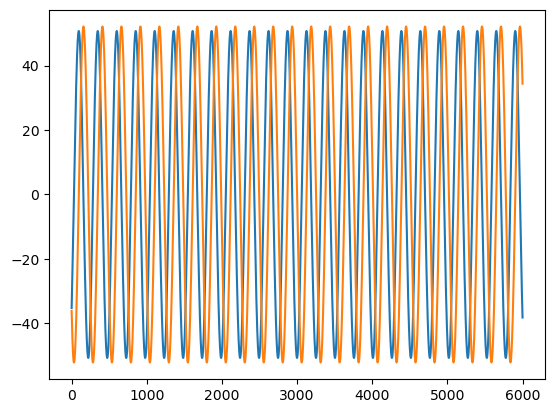

In [125]:
plt.plot(Z[0,:,0])
plt.plot(Z[0,:,1])

<BarContainer object of 20 artists>

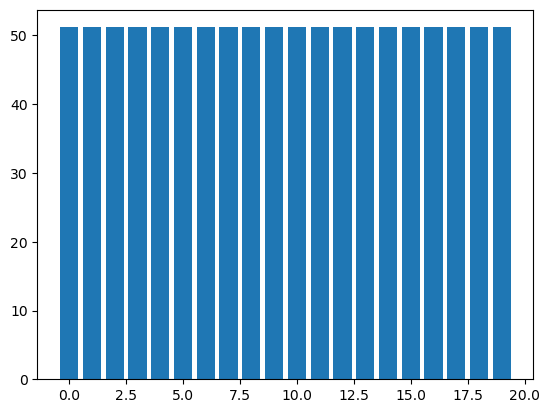

In [127]:
plt.bar(np.arange(20), var_hists[1])

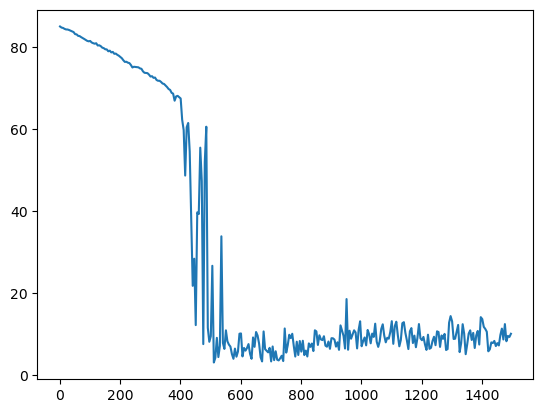

In [10]:
#plt.plot(Ms, radii)
#plt.xlim([0, 20])

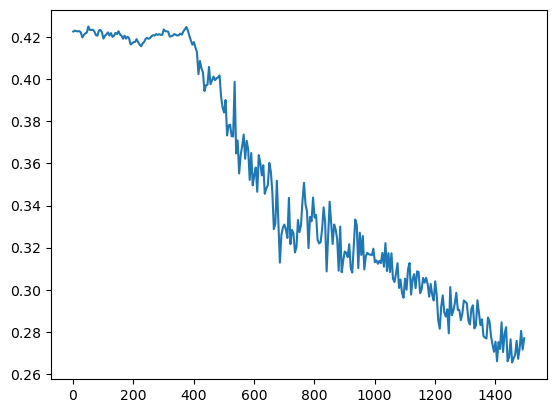

In [11]:
#plt.plot(Ms, avg_gains)

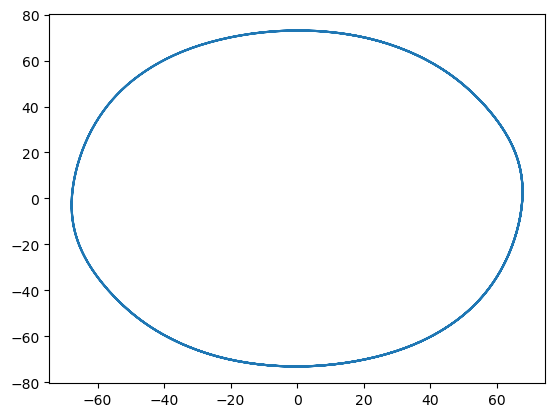

In [30]:
#radii = [np.sqrt(Z[0,3000:,0]**2 + Z[0,3000:,1]**2).mean() for Z in Zs]
#plt.plot(Zs[100][0,3000:,0], Zs[100][0,3000:,1])

Text(0.5, 0, '$M$')

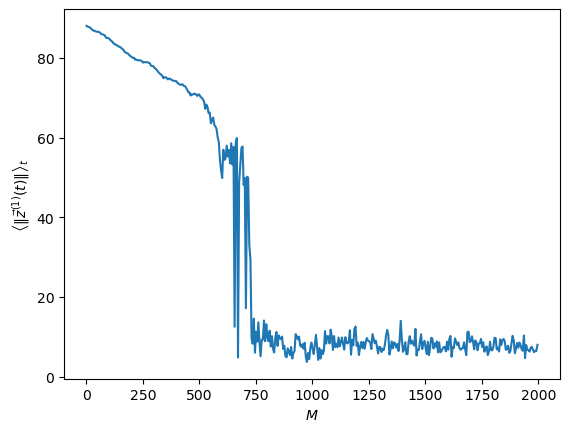

In [31]:
#plt.plot(Ms, [np.sqrt(Z[0,3000:,0]**2 + Z[0,3000:,1]**2).mean() for Z in Zs])
#plt.ylabel(r'$\left<\|\vec{z}^{(1)}(t)\|\right>_t$')
#plt.xlabel(r'$M$')

Text(0, 0.5, "$\\left<\\phi'\\right>$")

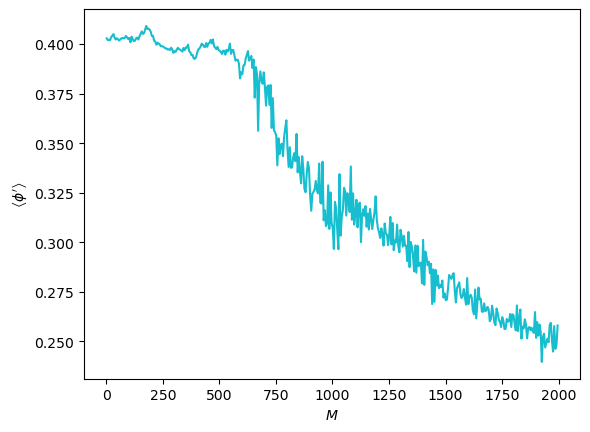

In [33]:
#plt.plot(Ms, avg_gains, 'C9')
#plt.ylim([0, 0.5])
#plt.xlabel('$M$')
#plt.ylabel(r"$\left<\phi'\right>$")

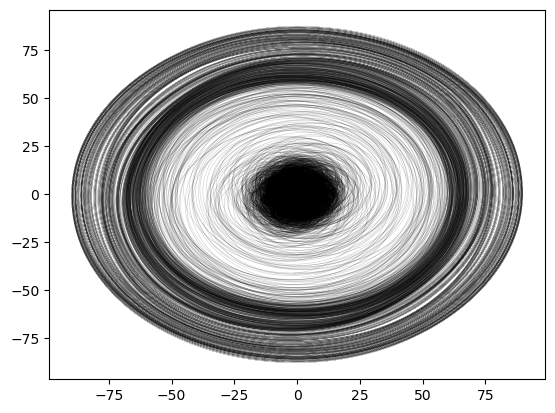

In [10]:
#for Z in Zs:
#    plt.plot(Z[0,800:,0], Z[0,800:,1], color='k', alpha=0.2, linewidth=0.4)

In [ ]:
processed_data = np.array([radii, avg_gains])

In [ ]:
### --- SAVE RESULTS -- ###
result = {'sim': sigma_mn_all, 'dim_emp': None,
          'i_seed': i_seed, 'config': params,
          'i_config': i_config, 'i_job': i_job}
try:
    result['processed_data'] = processed_data
except NameError:
    pass
    
try:
    save_dir = os.environ['SAVEDIR']
    if not os.path.exists(save_dir):
        os.mkdir(save_dir)
    save_path = os.path.join(save_dir, 'result_{}'.format(i_job))

    with open(save_path, 'wb') as f:
        pickle.dump(result, f)
except KeyError:
    pass

In [20]:
###Truncate file above
file_name = 'Figure_2_increase_M'
job_name = 'radii_avg_gains_change_N'
project_dir = '/home/om2382/low-rank-dims/'
main_script_path = os.path.join(project_dir, 'cluster_main_scripts', job_name + '.py')
get_ipython().run_cell_magic('javascript', '', 'IPython.notebook.save_notebook()')
get_ipython().system('jupyter nbconvert --to script --no-prompt {}.ipynb'.format(file_name))
get_ipython().system('awk "/###Truncate/ {{exit}} {{print}}" {}.py'.format(file_name))
get_ipython().system('sed -i "/###Truncate/Q" {}.py'.format(file_name))
get_ipython().system('mv {}.py {}'.format(file_name, main_script_path))

<IPython.core.display.Javascript object>

[NbConvertApp] Converting notebook Figure_2_increase_M.ipynb to script
[NbConvertApp] Writing 15838 bytes to Figure_2_increase_M.py
awk: cmd. line:1: /###Truncate/ <IPython.core.autocall.ZMQExitAutocall object at 0x2b7b7beb5750> <built-in function print>
awk: cmd. line:1:                       ^ syntax error
awk: cmd. line:1: /###Truncate/ <IPython.core.autocall.ZMQExitAutocall object at 0x2b7b7beb5750> <built-in function print>
awk: cmd. line:1:                                                                                ^ syntax error


In [21]:
###Submit job to cluster
n_jobs = len(micro_configs)
write_job_file(job_name, py_file_name='{}.py'.format(job_name), mem=64, n_hours=24, n_gpus=1,
               results_subdir='Multi_Task_Elife')
job_script_path = os.path.join(project_dir, 'job_scripts', job_name + '.s')
submit_job(job_script_path, n_jobs, execute=False,
           results_subdir='Multi_Task_Elife', lkumar=True)

rm: cannot remove ‘/home/om2382/low-rank-dims/results/Multi_Task_Elife/radii_avg_gains_change_N/result_*’: No such file or directory
sending incremental file list
mft-theory/
mft-theory/.DS_Store
mft-theory/.gitignore
mft-theory/README.md
mft-theory/__init__.py
mft-theory/jupyter_notebook.py
mft-theory/main.ipynb
mft-theory/.idea/
mft-theory/.idea/mft-theory.iml
mft-theory/.idea/misc.xml
mft-theory/.idea/modules.xml
mft-theory/.idea/vanilla-rtrl.iml
mft-theory/.idea/vcs.xml
mft-theory/.idea/workspace.xml
mft-theory/.idea/codeStyles/
mft-theory/.idea/codeStyles/codeStyleConfig.xml
mft-theory/.ipynb_checkpoints/
mft-theory/.ipynb_checkpoints/main-checkpoint.ipynb
mft-theory/LDR_dim/
mft-theory/LDR_dim/__init__.py
mft-theory/LDR_dim/condensed_tasks.py
mft-theory/LDR_dim/extensive_tasks.py
mft-theory/LDR_dim/solve_ldr.ipynb
mft-theory/LDR_dim/util.py
mft-theory/LDR_dim/LDR-dim/
mft-theory/LDR_dim/LDR-dim/__init__.py
mft-theory/LDR_dim/LDR-dim/solve_ldr.ipynb
mft-theory/LDR_dim/LDR-dim/util

In [129]:
###Get job status
get_ipython().system('squeue -u om2382')

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
           4962212    lkumar  jupyter   om2382  R   20:48:46      1 ax16


In [27]:
project_dir = '/home/om2382/low-rank-dims/'
job_name = 'radii_avg_gains_change_N'
job_script_path = os.path.join(project_dir, 'job_scripts', job_name + '.s')
theory_results = unpack_processed_data(job_script_path, results_subdir='Multi_Task_Elife')

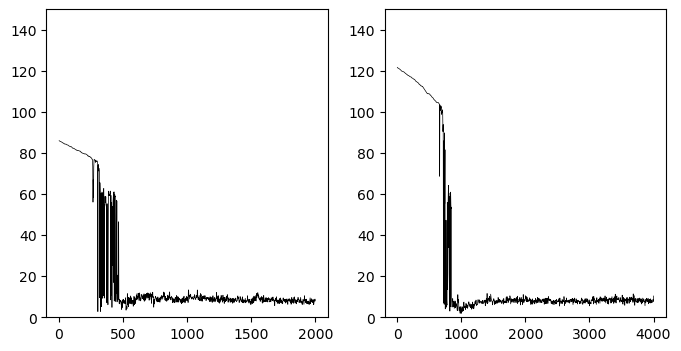

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
Ms = np.linspace(1, 2000, 1000, dtype=int)
seeds = [19]
for i_seed in seeds:
    ax[0].plot(Ms, theory_results[1][0,i_seed,0], color='k', linewidth=0.5)
Ms = np.linspace(1, 4000, 1000, dtype=int)
for i_seed in seeds:
    ax[1].plot(Ms, theory_results[1][1,i_seed,0], color='k', linewidth=0.5)

for i in range(2):
    ax[i].set_ylim([0, 150])

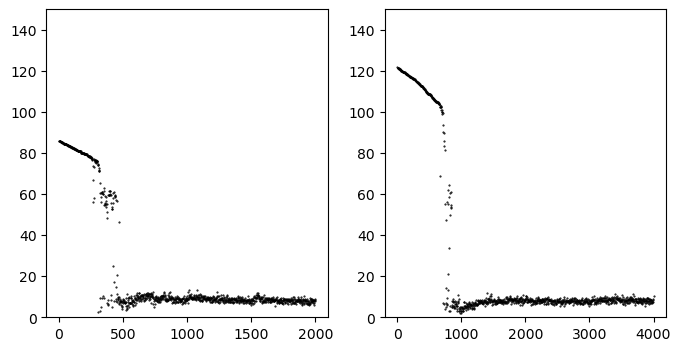

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
Ms = np.linspace(1, 2000, 1000, dtype=int)
seeds = [19]
for i_seed in seeds:
    ax[0].plot(Ms, theory_results[1][0,i_seed,0], '.', color='k', markersize=1)
Ms = np.linspace(1, 4000, 1000, dtype=int)
for i_seed in seeds:
    ax[1].plot(Ms, theory_results[1][1,i_seed,0], '.', color='k', markersize=1)

for i in range(2):
    ax[i].set_ylim([0, 150])

In [54]:
with open('packaged_results/M1_to_4000', 'wb') as f:
    pickle.dump(theory_results, f)

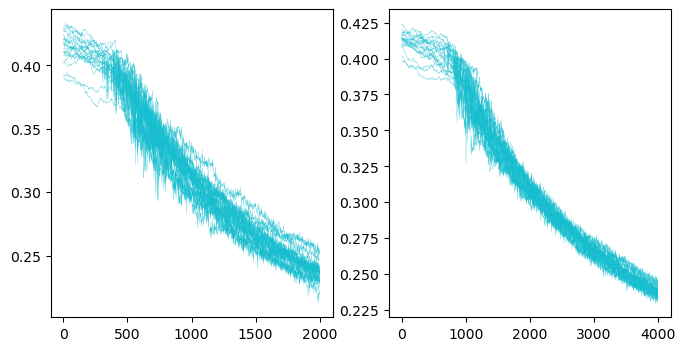

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
Ms = np.linspace(1, 2000, 1000, dtype=int)
for i_seed in range(20):
    ax[0].plot(Ms, theory_results[1][0,i_seed,1], color='C9', linewidth=0.2)
Ms = np.linspace(1, 4000, 1000, dtype=int)
for i_seed in range(20):
    ax[1].plot(Ms, theory_results[1][1,i_seed,1], color='C9', linewidth=0.2)

#for i in range(2):
#    ax[i].set_ylim([0, 150])

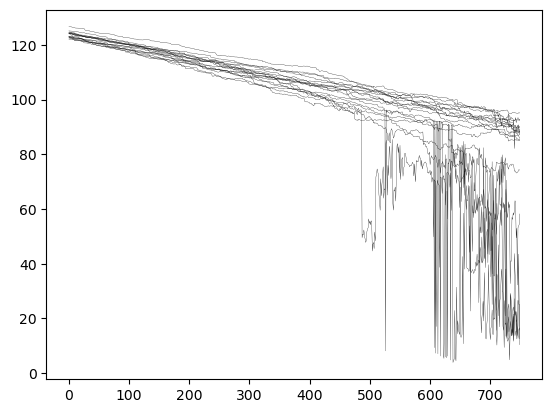

In [77]:
for i_seed in range(18):
    plt.plot(theory_results[1][i_seed,0,:], color='k', linewidth=0.2)

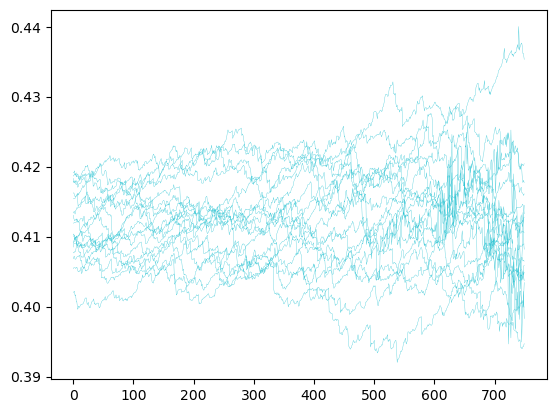

In [78]:
for i_seed in range(18):
    plt.plot(theory_results[1][i_seed,1,:], color='C9', linewidth=0.2)